# Galileo - Chain Pool Eval

### Imports

In [2]:
import os
import matplotlib.pyplot as plt

from src.constants import Constant as c
from src.chain_poll import ChainPollEval

/Users/neel/Library/Caches/pypoetry/virtualenvs/src-ySEjC4LY-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Run Eval

In [3]:
api_key = c.OPENAI_API_KEY
model = "gpt-4o"
cp = ChainPollEval(api_key=api_key, model=model, docs=True)
cp.load_data(path="../data/r_plus_refresh_docs_mapped.csv", subset="hotpot")
cp.run_eval(parallel=True)

Evaluating: 100%|██████████| 148/148 [01:08<00:00,  2.16it/s]


In [4]:
cp.save_records(save_dir="../data/runs")

### Generate Eval Report

In [6]:
df = ChainPollEval.get_report(path="../data/runs")

In [7]:
df.to_csv("../data/report-refresh-rplus-docs-hotpot-multi-calls-questions.csv")
df

,record_no,source,doc_type,question,response,score,cp_score,ragas_score
0,1,hotpot,multi,Which band was formed first Killing Joke or Ac...,"Killing Joke was formed in 1978, while Accepta...",True,1.0,1.0
1,2,hotpot,multi,What album did John Lennon release before the ...,"John Lennon released the album ""John Lennon/Pl...",True,1.0,1.0
2,3,hotpot,multi,"The lead of the CBS series ""I Had Three Wives""...","The lead of the CBS series ""I Had Three Wives""...",True,1.0,1.0
3,4,hotpot,multi,Who created the manga series originally serial...,"Tonde Burin (とんでぶーりん, Tonde Būrin) is a superh...",True,1.0,1.0
4,5,hotpot,multi,In what group was the writer of Songs and Danc...,The writer of Songs and Dances of Death was Mo...,True,1.0,1.0
...,...,...,...,...,...,...,...,...
143,144,hotpot,multi,"Which battle occurred first, the Battle of Man...",The Battle of Manila occurred first. The first...,False,0.8,1.0
144,145,hotpot,multi,Which host of Sunday Night Safran has the hebr...,John Michael Safran is the host of Sunday Nigh...,True,1.0,1.0
145,146,hotpot,multi,What was the benefit of reintroducing piston p...,The Orenda OE600 is a 600 hp-class liquid-cool...,True,1.0,1.0
146,147,hotpot,multi,What kind of group does Takahiro Moriuchi and ...,Takahiro Moriuchi and Doug Pinnick are both mu...,True,0.0,1.0


In [6]:
cp.get_record_info(record_no=60)

QUESTION - ['Which band was formed first, Wavves or Social Code?']
RESPONSE - ['Social Code was formed first, in 1999. Wavves was formed later, in 2008.']
SOURCE - ['hotpot']
[{'judgement': 'Yes',
  'reasonings': [{'document': 1,
                  'reasoning': 'This document discusses online etiquette and '
                               'the differences between communication over the '
                               'Internet and in person. It does not provide '
                               'any information about the formation dates of '
                               'bands Social Code or Wavves.'},
                 {'document': 2,
                  'reasoning': 'This document mentions that Social Code was a '
                               'Canadian alternative rock group formed in 1999 '
                               'in St. Albert. This supports the claim that '
                               'Social Code was formed in 1999.'},
                 {'document': 3,
                 

array([list([{'reasonings': [{'document': 1, 'reasoning': 'This document discusses online etiquette and the differences between communication over the Internet and in person. It does not provide any information about the formation dates of bands Social Code or Wavves.'}, {'document': 2, 'reasoning': 'This document mentions that Social Code was a Canadian alternative rock group formed in 1999 in St. Albert. This supports the claim that Social Code was formed in 1999.'}, {'document': 3, 'reasoning': 'This document discusses the concept of blood feuds in Albanian culture and does not provide any information about the formation dates of bands Social Code or Wavves.'}, {'document': 4, 'reasoning': 'This document provides information about the Canadian punk band Hostage Life and their history. It mentions Social Code in the context of a music festival but does not provide formation dates for either Social Code or Wavves.'}, {'document': 5, 'reasoning': "This document discusses Social Code's 

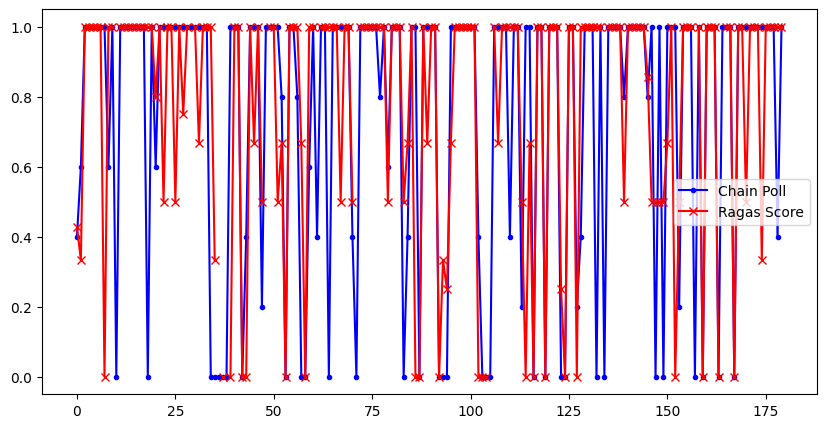

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(df.shape[0]), df["cp_score"], marker=".", label="Chain Poll", color="blue")
ax.plot(range(df.shape[0]), df["ragas_score"], marker="x", label="Ragas Score", color="red")

ax.legend()
plt.show()